In [1]:
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image


def upsample(new_line):
#     print('Original Dimensions : ',new_line.shape)
    scale_percent = 150 # percent of original size
    width = int(new_line.shape[1] * scale_percent / 100)
    height = int(new_line.shape[0])
    dim = (width, height)
    # resize image
    resized = cv2.resize(new_line, dim, interpolation = cv2.INTER_AREA)
#     print('Resized Dimensions : ',resized.shape)
    return np.array([x[:width] for x in resized])



In [21]:

# if __name__ == '__main__':
file_name = 'klara_4k_55fps.MOV'
# file_name = 'fastnacht_short.mp4'
pixel_v_coordinate = 500 # vertical pixel line to use for collating
upsample_flag = True
slice_width = 2  # lowers horizontal res, set to 1 if upsample_flag set to false


In [25]:


file_loc = f'./01_input/{file_name}'

video = cv2.VideoCapture(file_loc)
# w_video = int(video.get(cv2.CAP_PROP_FRAME_WIDTH ))
h_video = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT ))
frames_counter = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# output_frame = Image.new("RGB", (frames_counter,h))
output_frame = []
with tqdm(total=frames_counter) as pbar:
    while True:
        read, frame = video.read()
        pbar.update(1)
        if not read:
            break
#         print(frame.shape)
        h,w,c = frame.shape        # todo opt
        new_line = np.array([x[pixel_v_coordinate:(pixel_v_coordinate+slice_width)][0][::-1] for x in frame]).astype('uint8').reshape(h, -1, c)
#         print(new_line.shape)
        if upsample_flag:
            new_line = upsample(new_line)
#         for _ in range(slice_width):
        output_frame.append(new_line)
# formatting

1199it [00:14, 81.89it/s]                                                                                                                                                                                                               


In [26]:

output_frame_array = np.array(output_frame[::-1])
output_frame_array_reshape = output_frame_array.reshape(-1, h_video, 3)
pil_img = Image.fromarray(output_frame_array_reshape).convert('RGB')
pil_img_final = pil_img.transpose(Image.ROTATE_90).rotate(180)

if upsample_flag:
    pil_img_final.save(f"./02_output/{file_name.split('.')[0]}_upsample_{slice_width}.png", "PNG")
else:
    pil_img_final.save(f"./02_output/{file_name.split('.')[0]}.png", "PNG")


/var/folders/lt/7_tkjv012yn6rr8jr6rsdl2w0000gn/T/ipykernel_6860/2149225190.py:4: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  pil_img_final = pil_img.transpose(Image.ROTATE_90).rotate(180)


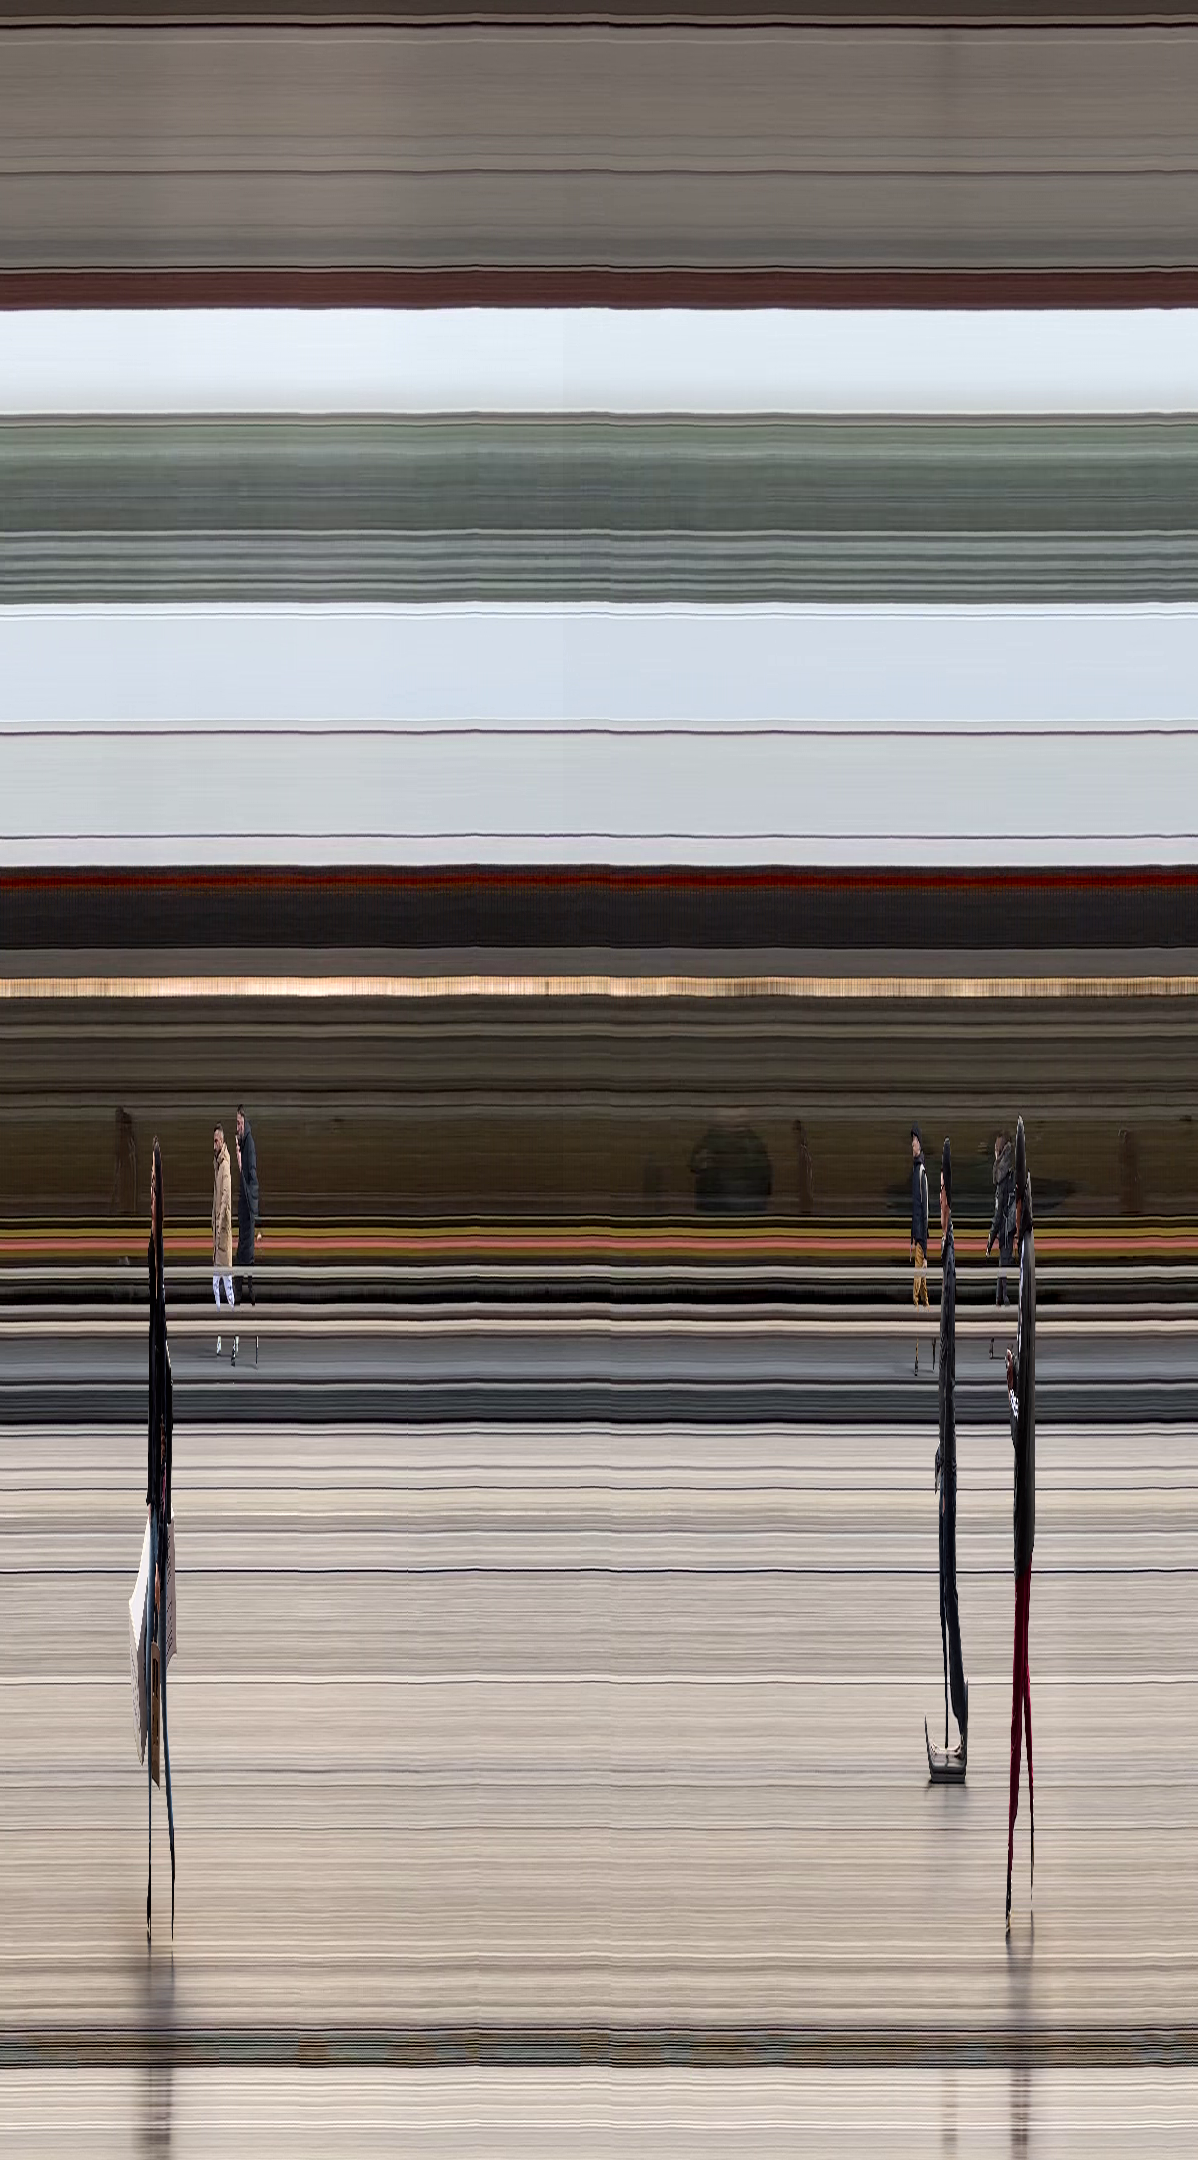

In [27]:
pil_img_final